In [ ]:
%load_ext autoreload
%autoreload 2
from Environment import Environment
from LoadBalancer import LoadBalancer
from Source import Source

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Running simple simulation
- 10 servers fixed
- arrivalProb 0.5 fixed
- two arrival types
- time limit 10

In [87]:
stopTime = 100
samplingInterval = 0.05
env = Environment(stopTime=stopTime)
loadBalancer = LoadBalancer(nServers=20, environment=env)
requestTypes = [(0.5,1,1,10),(0.5,2,2,10)]
arrivalProb = 0.7
source = Source(samplingInterval, arrivalProb, requestTypes, loadBalancer, env)
source.scheduleNextSampleEvent()
env.run(debug=True)

0.05 | Planned event for time 10.05 with name cancelRequest
0.05 | Planned event for time 3.5498584439614165 with name requestFinishProcessing
0.05 | Planned event for time 0.1 with name Arrival sampling event
0.05 | Handled event at time 0.05 with name Arrival sampling event
0.1 | Planned event for time 10.1 with name cancelRequest
0.1 | Planned event for time 1.3090652396597402 with name requestFinishProcessing
0.1 | Planned event for time 0.15000000000000002 with name Arrival sampling event
0.1 | Handled event at time 0.1 with name Arrival sampling event
0.15000000000000002 | Planned event for time 10.15 with name cancelRequest
0.15000000000000002 | Planned event for time -0.3170107011787143 with name requestFinishProcessing
0.15000000000000002 | Planned event for time 0.2 with name Arrival sampling event
0.15000000000000002 | Handled event at time 0.15000000000000002 with name Arrival sampling event
-0.3170107011787143 | Handled event at time -0.3170107011787143 with name requestFi

## Checking results

Cost of running the system: 537.9999999999407


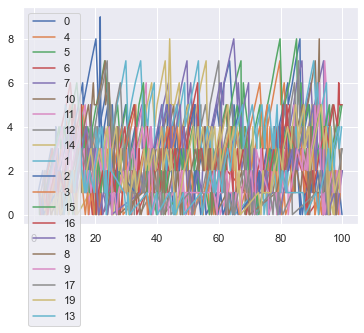

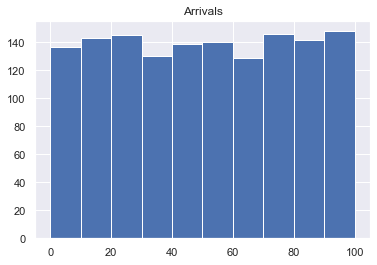

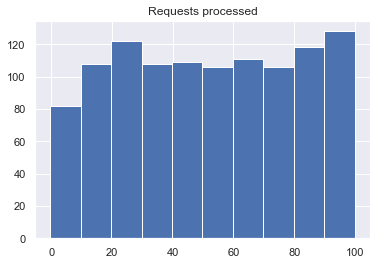

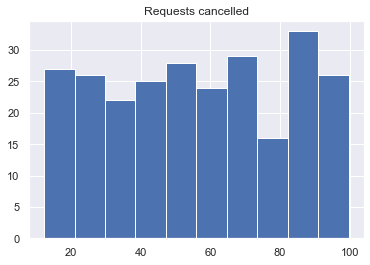

In [89]:
def plotSimulationSummary(environment: Environment, nServers=20):
    processCost = 1
    cancelCost = -10
    serverCost = 1
    cost = len(environment.log['requestProcessed']) *1 + len(environment.log['requestCancelled']) * -10 + nServers*env.currentTime*serverCost
    print(f"Cost of running the system: {cost}")
    queueSizeKeys = [key for key in environment.log.keys() if 'queueSize' in key]
    for key in queueSizeKeys:
        sns.lineplot(x=environment.logTime[key], y=environment.log[key])
    plt.legend(labels=[key.strip("queueSize_") for key in queueSizeKeys])

    plt.figure()
    plt.hist(environment.logTime["arrivalEvent"])
    plt.title("Arrivals")

    plt.figure()
    plt.hist(environment.logTime["requestProcessed"])
    plt.title("Requests processed")

    plt.figure()
    plt.hist(environment.logTime["requestCancelled"])
    plt.title("Requests cancelled")


plotSimulationSummary(environment=env)
